**Introduction**

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. 
The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

**Business Domain Value**

In the support process, incoming incidents are analysed and assessed by organization’s support teams to fulfil the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams).
 This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. 

Around ~54% of the incidents are resolved by L1 / L2 teams. In case L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams).
 Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. 
Around ~56% of incidents are resolved by Functional / L3 teams. In case if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. 
During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks

**Project Description**

In this capstone project, the goal is to build a classifier that can classify the tickets by analysing text. Details about the data and dataset files are given in below link
https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

**Milestone 1:**

*   Pre-Processing, Data Visualisation and EDA Overview

*   Exploring the given Data files

*   Understanding the structure of data
*   Missing points in data


*   Finding inconsistencies in the data


*   Visualizing different patterns 

*   Visualizing different text features
*   Dealing with missing values











Explore the data files 

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Set your project path 
project_path = "/content/drive/My Drive/CollabData/"

In [4]:
tickets_df = pd.read_excel(project_path+'input_data.xlsx')
print(tickets_df.shape)
tickets_df.head()
#It was found that the Given data consists of 8500 records with 4 Features as shown below

(8500, 4)


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [5]:
# the concise summary of the data provided looks as below
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Above Details shows that there is a null values in columns.the list below shows that short description has 8 rows with null value while description has 1 value as null

In [6]:
tickets_df.isna().sum()


Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [7]:
convert_dict = {
    'Short description':str,
    'Description':str,
    'Caller':str,
    'Assignment group':str,
}
tickets_df = tickets_df.astype(convert_dict)

In [8]:
tickets_df.groupby(['Assignment group']).size()


Assignment group
GRP_0     3976
GRP_1       31
GRP_10     140
GRP_11      30
GRP_12     257
          ... 
GRP_71       2
GRP_72       2
GRP_73       1
GRP_8      661
GRP_9      252
Length: 74, dtype: int64

Above details shows that this data has 74 unique Assignment group

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(color_codes=True)
%matplotlib inline

In [10]:
px.pie(tickets_df,'Assignment group',hole=0.3,template="plotly_dark")


In [11]:
group_frequency = dict(tickets_df['Assignment group'].value_counts())
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(35)

,frequency,percent representation,cumulative percentage
GRP_0,3976,0.467765,0.467765
GRP_8,661,0.077765,0.545529
GRP_24,289,0.034000,0.579529
GRP_12,257,0.030235,0.609765
GRP_9,252,0.029647,0.639412
GRP_2,241,0.028353,0.667765
GRP_19,215,0.025294,0.693059
GRP_3,200,0.023529,0.716588
GRP_6,184,0.021647,0.738235
GRP_13,145,0.017059,0.755294


We have 74 labels for classification.Grp_0 and Grp_8 is handling almost 55% of ticket so we can say L1 and L2 team is GRP_0 AND GRP_8. 

As we see there are more tickets from few callers.We have to find out if for particular caller ticket is getting assigned to particular group.

In [12]:
groups =tickets_df.groupby(['Caller', 'Assignment group']).size().sort_values( ascending=False)

groups

Caller             Assignment group
bpctwhsn kzqsbmtp  GRP_8               362
                   GRP_9               153
fumkcsji sarmtlhy  GRP_0               132
bpctwhsn kzqsbmtp  GRP_5                96
                   GRP_6                89
                                      ... 
ndsyovil pymzvdqa  GRP_19                1
ndrtahvm kjhdybzm  GRP_0                 1
ndkrcxjb hpormqtx  GRP_42                1
                   GRP_0                 1
DEsowkrH sciejzNE  GRP_13                1
Length: 4464, dtype: int64

we don't see any pattern between group assignment and caller. Let's see the visualization of word in short and long description

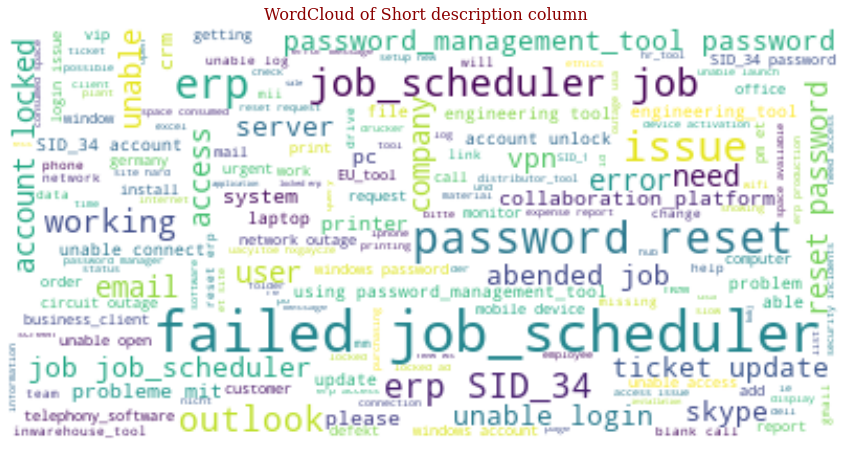

In [13]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(tickets_df['Short description'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

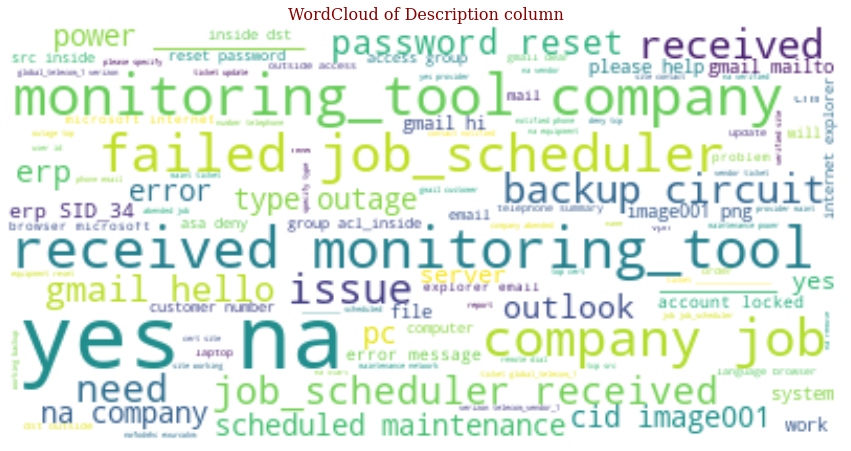

In [14]:
All_words = ""
All_words += " ".join(tickets_df.Description)
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Identify if tickets aare raised in any language other than english

In [15]:
pip install langdetect

     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=ddbcb38bc8c1724ad633ad661e4115d015c389c2eef49e45b896570b82774e47
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [16]:
from langdetect import detect 
for idx, val in enumerate(tickets_df['Short description'].values):
    try:
        language = detect(val)
        tickets_df.loc[idx,'short_desc_language'] = language
    except:
        language = "error"
        tickets_df.loc[idx,'short_desc_language'] = language
        print(" row ", idx," throws and error:", val)

 row  1836  throws and error: bgflmyar.xgufkidq@gmail.com
 row  2975  throws and error: ???????????????????


In [17]:
#detecting desc language
for idx, val in enumerate(tickets_df['Description'].values):
    try:
        language = detect(val)
        tickets_df.loc[idx,'desc_language'] = language
    except:
        language = "error"
        tickets_df.loc[idx,'desc_language'] = language
        print(" row ", idx," throws and error:", val)

 row  6253  throws and error: +86  
 row  6371  throws and error:  


 row  7397  throws and error: 



In [18]:
#plot = tickets_df['desc_language'].value_counts().plot.pie( autopct='%1.0f%%', radius=2)
px.pie(tickets_df,'desc_language',hole=0.3,template="plotly_dark")

In [19]:
px.pie(tickets_df,'short_desc_language',hole=0.3,template="plotly_dark")

English is being used widely in ticket.Let's check relation between group assignment and language

In [20]:
tickets_df.groupby(['desc_language', 'Assignment group']).size()

desc_language  Assignment group
af             GRP_0               232
               GRP_12                1
               GRP_17                1
               GRP_19                5
               GRP_2                 2
                                  ... 
tl             GRP_13                1
               GRP_19                1
tr             GRP_30                1
               GRP_31                1
               GRP_48                1
Length: 276, dtype: int64

In [21]:
px.histogram(tickets_df, 'Assignment group', 
             log_y = True, color="Caller")

In [22]:
px.histogram(tickets_df, 'desc_language', 
             log_y = True, color="Assignment group")

There is no relation found in language and Assignment group.Let's convert all text to english

## **CLEANING DATA**

To clean the data we will do below things


1.   Convert all Data to lower case
2.   Merge Short Description with Description
3.   Adding regex expression list to remove unwanted character
4.   Remove Stop Words
5.   Fill Null columns
6.   Translate Non English













In [23]:
pip install googletrans

     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 921kB 8.6MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=b26c76b85d167ceb0f4274589e7d41eda6623f979b54fac97b0abbe588844b24
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=aeb15d5a2e371f7e9e6c25cebc84f188ea028205785af26c6f205b84da86b341
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [24]:
from googletrans import Translator

translator = Translator()
for ind in tickets_df[tickets_df["desc_language"] != 'en'].index: 
   try:
     r1 = translator.translate(tickets_df['Description'][ind],src=tickets_df["desc_language"][ind])
     tickets_df.at[ind, 'Description'] = r1.text  
   except:
      tickets_df.at[ind, 'Description']
tickets_df['Description'][8499]

"Different prgramdntymes cannot be opened on several pc's. area cnc."

In [25]:
from googletrans import Translator

translator = Translator()
for ind in tickets_df[tickets_df["short_desc_language"] != 'en'].index: 
   try:
     r1 = translator.translate(tickets_df['Short description'][ind],src=tickets_df["desc_language"][ind])
     tickets_df.at[ind, 'Short description'] = r1.text  
   except:
     tickets_df.at[ind, 'Short description']




In [26]:
 del tickets_df['short_desc_language']
 del tickets_df['desc_language']
tickets_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [27]:
tickets_df['FullDescription'] = tickets_df['Short description'].str.cat(tickets_df['Description'], sep=' ', na_rep=' ')
tickets_df.head()

,Short description,Description,Caller,Assignment group,FullDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [28]:
tickets_df['WordCount'] = [len(desc.split(' ')) for desc in tickets_df['FullDescription']]
tickets_df.head()
wordCount = tickets_df['WordCount'].sum()

In [29]:
print("Total Word Count: ", wordCount)

Total Word Count:  310918


In [30]:
tickets_df.head()

,Short description,Description,Caller,Assignment group,FullDescription,WordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4


Define Regular expression to remove common words like received ,\r\n

In [31]:
def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []

    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList

In [32]:
tickets_df['CleanDescription'] = tickets_df['FullDescription']

In [33]:
for regex in getRegexList():
  tickets_df['CleanDescription'] = tickets_df['CleanDescription'].str.lower().str.replace(regex, ' ')
tickets_df.head()



,Short description,Description,Caller,Assignment group,FullDescription,WordCount,CleanDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meetings skype meetings et...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log to vpn cannot log to vpn best
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access hr tool page unable access hr to...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,skype error skype error


Remove Stop Words

In [34]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer #get root word

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
stop_words = set(stopwords.words('english'))

In [37]:
#custom addition to stop words
stop_words.add("hello")
stop_words.add("bye")
stop_words.add("hi")
stop_words.add("thank")
stop_words.add("gmail")
stop_words.add("sender")
stop_words.add("mailto")
stop_words.add("yes")
stop_words.add("no")
stop_words.add("na")
stop_words.add("company")
stop_words.add("access_group")
stop_words.add("please")
stop_words.add("pls")
stop_words.add("help")
stop_words.add("etc")
stop_words.add("sir")
stop_words.add("sorry")
stop_words.add("get")
stop_words.add("tool")
stop_words.add("name")

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
processed_all_documents = list()

for desc in tickets_df['CleanDescription']:
    word_tokens = word_tokenize(desc) 
    
    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    # Lemmetization
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)

In [41]:
tickets_df['CleanDescription'] = processed_all_documents

In [42]:
tickets_df['CleanWordCount'] = [len(desc.split(' ')) for desc in tickets_df['CleanDescription']]
tickets_df.head()
CleanWordCount = tickets_df['CleanWordCount'].sum()
print("Total Word Count Before Cleaning: ", wordCount)
print ("Clean Word count After Cleaning:", CleanWordCount)

Total Word Count Before Cleaning:  310918
Clean Word count After Cleaning: 168607


In [43]:
tickets_df.head()

,Short description,Description,Caller,Assignment group,FullDescription,WordCount,CleanDescription,CleanWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,22
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook team meet skype meet appear outlook ca...,12
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn log vpn best,6
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access hr page unable access hr page,8
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,skype error skype error,4


Remove Duplicate Word

In [44]:
from collections import OrderedDict

In [45]:
tickets_df['CleanDescription'] = (tickets_df['CleanDescription'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

In [46]:
tickets_df.head()

,Short description,Description,Caller,Assignment group,FullDescription,WordCount,CleanDescription,CleanWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,22
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook team meet skype appear calendar somebo...,12
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn best,6
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access hr page,8
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,skype error,4


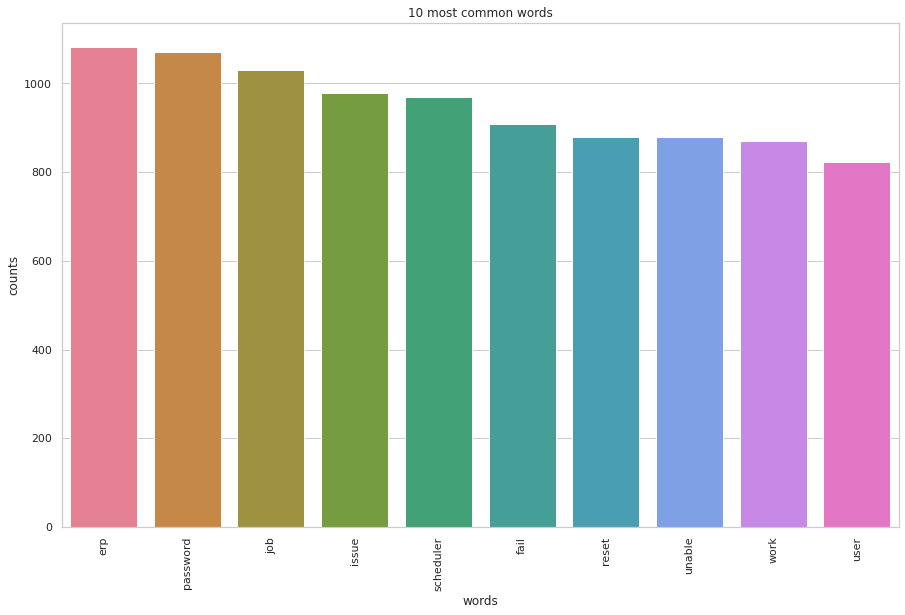

In [47]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tickets_df['CleanDescription'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [48]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 20
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
outlook access issue send work email open need subject error hostname crm best unable time problem team new server request

Topic #1:
erp account unable issue user error sid login lock password update able need unlock ticket log try connect change check

Topic #2:
network ticket work email power site et phone contact start global reset active vendor type schedule outage remote notify additional

Topic #3:
job scheduler fail password reset sid internet erp microsoft explorer browser telephone language summary number email customer abended management hostname

Topic #4:
skype printer print work user need phone alert com available hostname device data log email summary let know connection source



## Label Encode the Target Column

In [49]:
le = preprocessing.LabelEncoder()
tickets_df["LabelEncodings"] = le.fit_transform(tickets_df["Assignment group"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)
tickets_df.head(5)

74


,Short description,Description,Caller,Assignment group,FullDescription,WordCount,CleanDescription,CleanWordCount,LabelEncodings
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,22,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook team meet skype appear calendar somebo...,12,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn best,6,0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access hr page,8,0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,4,skype error,4,0


## Data Augmentation

Since the data is highly imbalanced, we will try to do data augmentation using word synonym

In [50]:
%load_ext autoreload
%autoreload 2
import importlib

In [51]:
pip install nlpaug

     |████████████████████████████████| 102kB 2.3MB/s 


In [151]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [152]:
nltk.download('averaged_perceptron_tagger')
nltk.download('omw')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [153]:
text = tickets_df['CleanDescription'][8309]

In [154]:
aug = naw.SynonymAug(aug_src='wordnet')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
abended job scheduler sid stop hana slt
Augmented Text:
abended line of work scheduler sid stop hana slt


In [155]:

aug = naw.AntonymAug()
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
abended job scheduler sid stop hana slt
Augmented Text:
abended job scheduler sid stop hana slt


In [156]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

In [291]:
train_x, test_x, train_y, test_y = train_test_split(tickets_df['CleanDescription'], y, test_size=0.3, random_state=102)

In [292]:
# 0 and 72
newdataset = pd.DataFrame({'CleanDescription': train_x,
                    'LabelEncoding': train_y})

In [293]:
newdataset[(newdataset["LabelEncoding"]== 0) | (newdataset["LabelEncoding"]== 72)].shape

(3246, 2)

In [294]:
newdatasetSynonymnWithoutL1L2 = newdataset[(newdataset["LabelEncoding"]!= 0) & (newdataset["LabelEncoding"]!= 72)]
newdatasetAntonymWithoutL1L2 = newdatasetSynonymnWithoutL1L2
newdatasetSynonymnWithoutL1L2.shape

(2704, 2)

In [295]:
aug = naw.SynonymAug(aug_src='wordnet')
for index, row in newdatasetSynonymnWithoutL1L2.iterrows():
   newdatasetSynonymnWithoutL1L2.loc[index, 'CleanDescription'] = aug.augment(row.CleanDescription)
  



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [296]:
newdatasetSynonymnWithoutL1L2.head()

,CleanDescription,LabelEncoding
7520,unable accession hostname,4
2182,job laptop weszfyok fbadnjhu,17
3794,archive server optical document local applicat...,42
2238,key figure hire bex analyzer sales event reven...,73
354,army of the pure speak play refer screen shoot...,11


In [345]:
aug = naw.AntonymAug()
for index, row in newdatasetAntonymWithoutL1L2.iterrows():
   newdatasetAntonymWithoutL1L2.loc[index, 'CleanDescription'] = aug.augment(row.CleanDescription)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [346]:
newdatasetAntonymWithoutL1L2.head()

,CleanDescription,LabelEncoding
7520,able accession hostname,4
2182,job laptop weszfyok fbadnjhu,17
3794,archive server optical document local applicat...,42
2238,key ground hire bex analyzer sales event reven...,73
354,army of the pure speak tightness refer screen ...,11


In [347]:
newframe = [newdataset,newdatasetSynonymnWithoutL1L2,newdatasetAntonymWithoutL1L2]

clean_tickets_df = pd.concat(newframe)

In [348]:
clean_tickets_df.shape


(11358, 2)

Creating Tf-Idf vectors for ticket descriptions

In [349]:
train_y = np.asarray(clean_tickets_df['LabelEncoding'])

In [350]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    CountVectorizer(binary=True),
    TfidfTransformer(use_idf=True),
)

In [351]:
tfidf_train_data = pipe.fit_transform(clean_tickets_df['CleanDescription']) 
tfidf_test_data = pipe.transform(test_x)

In [352]:
tfidf_train_data.shape

(11358, 10946)

In [353]:
tfidf_test_data.shape

(2550, 10946)

In [354]:
test_x.shape

(2550,)

## Machine Learning Models

In [355]:
compare_results = pd.DataFrame(columns=['Algorithm Name', 'Accuracy','Precision','Recall' ,'F1 Score'])

In [356]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted',zero_division=0,)             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted',zero_division=0)
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted',zero_division=0)
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

**Decision Trees**

In [357]:
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier(criterion = "entropy")
dec_model.fit(tfidf_train_data, train_y)
preds_test = dec_model.predict(tfidf_test_data)
preds_train = dec_model.predict(tfidf_train_data)

In [358]:
accuracy, precision, recall, f1 = get_metrics(test_y, preds_test)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.530, precision = 0.522, recall = 0.530, f1 = 0.521


In [359]:
compare_results = compare_results.append({'Algorithm Name': 'Decision Tree','Accuracy':accuracy,'Precision':precision,'Recall':precision ,'F1 Score': f1}, ignore_index=True)

In [360]:
print(classification_report(test_y, preds_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1175
           1       0.11      0.14      0.12         7
           2       0.60      0.41      0.49        44
           3       0.00      0.00      0.00         8
           4       0.42      0.47      0.44        77
           5       0.23      0.16      0.19        57
           6       0.19      0.15      0.17        33
           7       0.10      0.18      0.12        11
           8       0.32      0.45      0.38        22
           9       0.62      0.43      0.51        23
          10       0.00      0.00      0.00        31
          11       0.16      0.18      0.17        67
          12       0.31      0.31      0.31        70
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         7
          16       0.40      0.40      0.40         5
          17       0.54    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



**Support Vector Machine - Linear**

In [378]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(tfidf_train_data, train_y)
y_pred = clf.predict(tfidf_test_data)
acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("SVM F1 Score: ", f_sc)

SVM-Linerar Score:  0.6752941176470588
SVM F1 Score:  0.6455148790828896


In [379]:
accuracy, precision, recall, f1 = get_metrics(test_y, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.675, precision = 0.651, recall = 0.675, f1 = 0.631


In [380]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1175
           1       0.60      0.43      0.50         7
           2       0.75      0.48      0.58        44
           3       1.00      0.12      0.22         8
           4       0.54      0.58      0.56        77
           5       0.60      0.51      0.55        57
           6       0.50      0.27      0.35        33
           7       1.00      0.27      0.43        11
           8       0.50      0.27      0.35        22
           9       0.88      0.96      0.92        23
          10       0.50      0.39      0.44        31
          11       0.45      0.34      0.39        67
          12       0.58      0.36      0.44        70
          13       0.50      0.06      0.11        16
          14       1.00      0.12      0.22         8
          15       1.00      0.29      0.44         7
          16       0.50      0.20      0.29         5
          17       0.86    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [363]:
compare_results = compare_results.append({'Algorithm Name': 'Linear-SVM','Accuracy':accuracy,'Precision':precision,'Recall':recall, 'F1 Score': f1}, ignore_index=True)

 Ensemble Techniques Random Forests

In [376]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=120, random_state=50, bootstrap=False)
rfcl = rfcl.fit(tfidf_train_data, train_y)
pred_RF = rfcl.predict(tfidf_test_data)
acc_RF = accuracy_score(test_y, pred_RF)
print(acc_RF)

0.6545098039215687


In [365]:
accuracy, precision, recall, f1 = get_metrics(test_y, pred_RF)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.655, precision = 0.616, recall = 0.655, f1 = 0.604


In [366]:
compare_results = compare_results.append({'Algorithm Name': 'Random Forest','Accuracy':accuracy,'Precision':precision,'Recall':recall, 'F1 Score': f1}, ignore_index=True)

In [367]:
compare_results.sort_values(by='Accuracy', ascending=False)

,Algorithm Name,Accuracy,Precision,Recall,F1 Score
1,Linear-SVM,0.675294,0.651104,0.675294,0.631339
2,Random Forest,0.654510,0.616019,0.654510,0.604028
0,Decision Tree,0.530196,0.521740,0.521740,0.521041


In [368]:
print(classification_report(test_y, pred_RF))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80      1175
           1       0.67      0.29      0.40         7
           2       0.83      0.43      0.57        44
           3       0.00      0.00      0.00         8
           4       0.57      0.58      0.58        77
           5       0.62      0.44      0.52        57
           6       0.57      0.24      0.34        33
           7       0.67      0.18      0.29        11
           8       0.57      0.36      0.44        22
           9       1.00      0.35      0.52        23
          10       0.36      0.26      0.30        31
          11       0.54      0.21      0.30        67
          12       0.57      0.33      0.42        70
          13       0.50      0.06      0.11        16
          14       1.00      0.12      0.22         8
          15       0.00      0.00      0.00         7
          16       1.00      0.20      0.33         5
          17       0.76    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Naive Bayes

In [369]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(tfidf_train_data, train_y)
y_pred = clf.predict(tfidf_test_data)
acc_score = accuracy_score(test_y, y_pred)
print("Naive Bayes Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Naive Bayes F1 Score: ", f_sc)

Naive Bayes Score:  0.5745098039215686
Naive Bayes F1 Score:  0.5686037147344599


# Boosting

In [370]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(tfidf_train_data, train_y)
pred_AB =abcl.predict(tfidf_test_data)
acc_AB = accuracy_score(test_y, pred_AB)

print("AdaBoost accuracy: ", acc_AB)

AdaBoost accuracy:  0.47019607843137257


In [371]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 110],
    'max_features': [20, 3],
   'n_estimators': [ 120, 200, 250]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [372]:
grid_search.fit(tfidf_train_data, train_y)
print(grid_search.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  4.2min finished


{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'n_estimators': 250}
